In [1]:
import numpy as np
import pandas as pd
from neural_toy import simple_neural_network_clf
import matplotlib.pyplot as plt

%matplotlib inline

## Two dimensional examples: $ x_1$ and $x_2$ fit to $y=\{0,1\}$

### Example 1

#### 1.1 generate data

In [2]:
size = 1000
noise = 0
x1 = []
x2 = []
label = []
def dist(p,c):
    return np.sqrt((p[0]- c[0])**2 + (p[1] - c[1])**2)

def genCircleData(n,radius,noise,label_level):
    ratio = 0.5 if label_level == 0 else 0.9
    circle_set = []
    for i in range(n):
        r = np.random.uniform(0, radius * ratio)
        angle = np.random.uniform(0, 2 * np.pi)
        x1 = r * np.sin(angle)
        x2 = r * np.cos(angle)
        noiseX = np.random.uniform(-radius, radius) * noise
        noiseY = np.random.uniform(-radius, radius) * noise
        if dist([x1 + noiseX, x2 + noiseY], [0,0]) > (radius * 0.4):
            level =1
            circle_set.append([x1,x2,level])
        elif dist([x1 + noiseX, x2 + noiseY], [0,0]) <= (radius * 0.2):
            level =0
            circle_set.append([x1,x2,level])
    return circle_set
circle_part1 = genCircleData(size/2,5,0,0)
circle_part2 = genCircleData(size/2,5,0,1)
x1 = [i[0] for i in circle_part1] + [i[0] for i in circle_part2]
x2 = [i[1] for i in circle_part1] + [i[1] for i in circle_part2]
label = [i[2] for i in circle_part1] + [i[2] for i in circle_part2]

#### 1.2 dataset visualization 

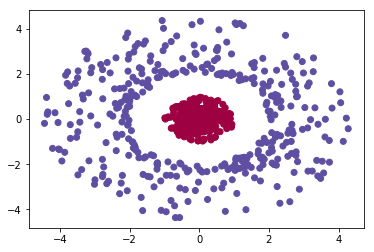

In [3]:
plt.scatter(x1, x2, c=label, cmap=plt.cm.Spectral)
plt.show()

m = len(x1)
x = np.array([[x1[i],x2[i]] for i in range(m)])
y = np.array([[1,0] if i==1 else [0,1] for i in label])

#### 1.3 model initialization

In [4]:
nn_1 = simple_neural_network_clf(n_node=6,n_epoch=10000,n_input_dim=2,n_output_dim=2,\
                            activation='sigmoid',learning_rate=0.03,random_state=1234)

#### 1.4 training

In [5]:
nn_1.build_model(x,y,print_loss=True,print_step=1000)

>>Loss after iteration 0: 0.317459 	 Accuracy: 0.549777
>>Loss after iteration 1000: 0.219005 	 Accuracy: 0.765230
>>Loss after iteration 2000: 0.193410 	 Accuracy: 0.861813
>>Loss after iteration 3000: 0.170365 	 Accuracy: 0.891530
>>Loss after iteration 4000: 0.150201 	 Accuracy: 0.888559
>>Loss after iteration 5000: 0.132603 	 Accuracy: 0.900446
>>Loss after iteration 6000: 0.116968 	 Accuracy: 0.907875
>>Loss after iteration 7000: 0.102984 	 Accuracy: 0.913819
>>Loss after iteration 8000: 0.090618 	 Accuracy: 0.940565
>>Loss after iteration 9000: 0.079690 	 Accuracy: 0.946508


#### 1.5 plot decision boundry

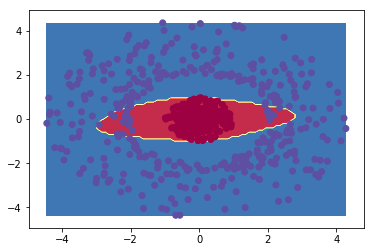

In [6]:
x1_min, x1_max = x[:,0].min(),x[:,0].max()
x2_min, x2_max = x[:,1].min(),x[:,1].max()
h = 0.1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

yy = nn_1.predict(np.c_[xx1.ravel(), xx2.ravel()])
yy = np.array([1 if i[0] ==1 else 0 for i in yy])
yy = yy.reshape(xx1.shape)
    
plt.contourf(xx1, xx2, yy, cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=label, cmap=plt.cm.Spectral)
plt.show()

### Example 2

#### 2.1 generate data

In [7]:
size = 1000
noise = 0
x1 = []
x2 = []
label = []

def genSpiral(n, label_level,moving):
    spiral_set = []
    for i in range(int(n)):
        r = float(i) / n * 5
        t = 1.75 * float(i) / n * 2 * np.pi + moving
        x1 = r * np.sin(t) + np.random.uniform(-1,1) * noise
        x2 = r * np.cos(t) + np.random.uniform(-1,1) * noise
        spiral_set.append([x1,x2,label_level])
    return spiral_set

spiral_part1 = genSpiral(size/2, label_level=0,moving=0)
spiral_part2 = genSpiral(size/2, label_level=1,moving=np.pi)
x1 = [i[0] for i in spiral_part1] + [i[0] for i in spiral_part2]
x2 = [i[1] for i in spiral_part1] + [i[1] for i in spiral_part2]
label = [i[2] for i in spiral_part1] + [i[2] for i in spiral_part2]

#### 2.2 dataset visualization 

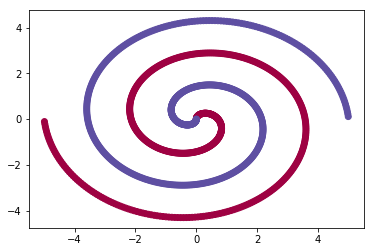

In [8]:
plt.scatter(x1, x2, c=label, cmap=plt.cm.Spectral)
plt.show()
m = len(x1)
x = np.array([[x1[i],x2[i],x1[i]**2,x2[i]**2,np.sin(x1[i]),np.sin(x2[i])] for i in range(m)])
y = np.array([[1,0] if i==1 else [0,1] for i in label])

#### 2.3 model initialization

In [9]:
nn_2 = simple_neural_network_clf(n_node=10,n_epoch=50000,n_input_dim=6,n_output_dim=2,\
                             activation='sigmoid',learning_rate=0.03,random_state=1234)

#### 2.4 training

In [10]:
nn_2.build_model(x,y,print_loss=True,print_step=5000)

>>Loss after iteration 0: 0.422049 	 Accuracy: 0.500000
>>Loss after iteration 5000: 0.209983 	 Accuracy: 0.708000
>>Loss after iteration 10000: 0.180894 	 Accuracy: 0.785000
>>Loss after iteration 15000: 0.144376 	 Accuracy: 0.879000
>>Loss after iteration 20000: 0.105559 	 Accuracy: 0.961000
>>Loss after iteration 25000: 0.076741 	 Accuracy: 0.974000
>>Loss after iteration 30000: 0.058132 	 Accuracy: 0.987000
>>Loss after iteration 35000: 0.045526 	 Accuracy: 0.996000
>>Loss after iteration 40000: 0.037162 	 Accuracy: 0.998000
>>Loss after iteration 45000: 0.031360 	 Accuracy: 0.999000


#### 2.5 plot decision boundry

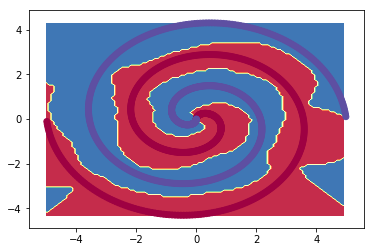

In [11]:
x1_min, x1_max = x[:,0].min(),x[:,0].max()
x2_min, x2_max = x[:,1].min(),x[:,1].max()
h = 0.1

xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, h), np.arange(x2_min, x2_max, h))

yy = nn_2.predict(np.c_[xx1.ravel(), xx2.ravel(),(xx1**2).ravel(),(xx2**2).ravel(),\
                          (np.sin(xx1)).ravel(),(np.sin(xx2)).ravel()])
yy = np.array([1 if i[0] ==1 else 0 for i in yy])
yy = yy.reshape(xx1.shape)
    
plt.contourf(xx1, xx2, yy, cmap=plt.cm.Spectral)
plt.scatter(x[:, 0], x[:, 1], c=label, cmap=plt.cm.Spectral)
plt.show()